# Load and View the Dataset

In [1]:
from dotenv import load_dotenv
import json
import pandas as pd
import os


# Load environment variables from the .env file
load_dotenv(override=True)
import json
from scripts.eval_utils import convert_to_eval_format_separate_fields

# Load JSONL Files into Memory
# train_file_path = "data/Hydrobonds_Original_WoSysPromptInUser/train_1000.jsonl"
# test_file_path = "data/Hydrobonds_Original_WoSysPromptInUser/test_100.jsonl"
# eval_file_path = "data/Hydrobonds_Original_WoSysPromptInUser/eval_100.jsonl"
# eval_format_file_path = "data/Hydrobonds_Original_WoSysPromptInUser/eval_format_100.jsonl"
train_file_path = "data/puzzles/puzzles_train_300.jsonl"
test_file_path = "data/puzzles/puzzles_valid_100.jsonl"
eval_file_path = "data/puzzles/puzzles_eval_final_100.jsonl"
eval_format_file_path = "data/puzzles/puzzles_eval_final_format_100.jsonl"


# Load training data
with open(train_file_path, "r", encoding="utf-8") as train_file:
    train_data = [json.loads(line) for line in train_file]

# Load test data
with open(test_file_path, "r", encoding="utf-8") as test_file:
    test_data = [json.loads(line) for line in test_file]

# Create Evaluation File from Training Data


# Extract 100 records from training data
eval_data = train_data[:100]

# Save evaluation data to a new file
with open(eval_file_path, "w", encoding="utf-8") as eval_file:
    for record in eval_data:
        eval_file.write(json.dumps(record) + "\n")

convert_to_eval_format_separate_fields(eval_file_path, eval_format_file_path)

train_df = pd.DataFrame(train_data)
test_df = pd.DataFrame(test_data)
eval_df = pd.DataFrame(eval_data)



✅ Converted 100 records to data/puzzles/puzzles_eval_final_format_100.jsonl


In [2]:
import pandas as pd
import json
import textwrap
from IPython.display import HTML, display

# Helper to wrap text and convert dict to pretty JSON
def format_cell(content, width=80):
    if isinstance(content, list) and len(content) > 0 and isinstance(content[0], dict):
        content = content[0].get("content", "")
    elif isinstance(content, dict):
        content = json.dumps(content, indent=2)
    return "<pre style='white-space: pre-wrap; font-family: monospace;'>{}</pre>".format(
        textwrap.fill(str(content), width=width)
    )

# Create a new DataFrame for display with formatted cells
sample_df = eval_df.head(3).copy()
sample_df['Prompt'] = sample_df['messages'].apply(lambda x: format_cell(x))
sample_df['Final Answer'] = sample_df['final_answer'].apply(lambda x: format_cell(x))
sample_df['Solution'] = sample_df['solution'].apply(lambda x: format_cell(x))

# Only keep desired columns
display_df = sample_df[['Prompt', 'Final Answer', 'Solution']]

# Render as HTML table
html_table = display_df.to_html(escape=False, index=False)
display(HTML(f"<h3>Sample Evaluation Records</h3>{html_table}"))


Prompt,Final Answer,Solution
"You are a helpful assistant. Your task is to solve the following logic and\npuzzle quiz: 2. Six people are standing in a circle, each of whom is either a\nknight - who always tells the truth, or a liar - who always lies. Each of them\nsaid one of two phrases: ""There is a liar next to me"" or ""There is a liar\nopposite me."" What is the minimum number of liars among them? Provide an example\nand prove that there cannot be fewer liars.",2,"Answer: 2. Solution. Let's number all the people standing clockwise (this way,\npeople with numbers 1 and 4, 2 and 5, 3 and 6 will stand opposite each other).\nZero liars is obviously impossible (then there would be only knights and no one\ncould say any of the phrases). If there is one liar, let's say his number is 1,\nthen the knight with number 3 has two knight neighbors and a knight standing\nopposite him. This means he cannot say either of these two phrases. Example\nwith two liars. Liars have numbers 1 and 2 and say ""There is a liar opposite\nme,"" which is also said by knights 4 and 5. The remaining knights (3 and 6) say\n""There is a liar next to me."""
"You are a helpful assistant. Your task is to solve the following logic and\npuzzle quiz: 2. Six natural numbers (possibly repeating) are written on the\nfaces of a cube, such that the numbers on adjacent faces differ by more than 1.\nWhat is the smallest possible value of the sum of these six numbers?",18,"Answer: 18. Solution: Consider three faces that share a common vertex. The\nnumbers on them differ pairwise by 2, so the smallest possible sum would be for\n$1+3+5=9$. The same can be said about the remaining three faces. Thus, the sum\ncannot be less than 18. We will show that 18 can be achieved - place the number\n1 on the top and bottom faces of the cube, 3 on the right and left faces, and 5\non the front and back faces."
"You are a helpful assistant. Your task is to solve the following logic and\npuzzle quiz: Problem 10.1. In each cell of a $5 \times 5$ table, a natural\nnumber is written in invisible ink. It is known that the sum of all the numbers\nis 200, and the sum of three numbers located inside any $1 \times 3$ rectangle\nis 23. What is the central number in the table? ![](https://cdn.mathpix.com/cro\npped/2024_05_06_a7569897979ba1659de3g-39.jpg?height=309&width=311&top_left_y=340\n&top_left_x=575)",16,"Answer: 16. Solution. Divide the $5 \times 5$ square without the central cell\ninto four $2 \times 3$ rectangles, and each of them into two $1 \times 3$\nrectangles. ![](https://cdn.mathpix.com/cropped/2024_05_06_a7569897979ba1659de3\ng-39.jpg?height=305&width=303&top_left_y=841&top_left_x=575) We get 8\nrectangles $1 \times 3$, the sum of the numbers in each of which is 23. Since\nthe sum of all the numbers is 200, we find the number in the central cell as\n$200 - 23 \cdot 8 = 16$."


# Evaluate Base Model - o3

In [3]:
from scripts.io_utils import upload_file



# eval_file_id = "file-2d7554dc2266432ea9d8a8483ead1117"
eval_file_id = await upload_file(file_name="puzzle_eval_final_format_set_prompts.jsonl", file_path=eval_format_file_path, purpose="evals")
print(f"Eval file ID: {eval_file_id}")


Using Azure API for file upload...
File 'puzzle_eval_final_format_set_prompts.jsonl' already exists on Azure. Returning existing file ID.
Eval file ID: file-97ccc7b1f9024ba7b061130299152160


In [4]:
# Create a new evaluation

from scripts.eval_utils import create_eval

# Call the create_eval function
eval_id = await create_eval("puzzle_base_eval_202-grader-4_1", grader_model="gpt-4.1", pass_threshold=4)

# eval_id = "eval_681fca42e0148190af03fecfd662e5d6"

print(f"Evaluation created with ID: {eval_id}")


Evaluation created successfully with ID: eval_6823f7877bd88190bc768ca70a878596
Evaluation created with ID: eval_6823f7877bd88190bc768ca70a878596


In [5]:
# Import the create_eval_run function from the eval_utils script
from scripts.eval_utils import create_eval_run


# Set your Model Deployment Names for the run
RUN_MODEL_DEPLOYMENTS = [
    # "o3",
    # "o4-mini",
    # "o3-mini",
    # "gpt-4o",
    # "gpt-4o-mini",
    # "gpt-4.1",
    # "gpt-4.1-mini",
    # "ft-o3-mini-puzzle",
    "ft-o3-mini-puzzle-300",
    # "o3-mini-2025-01-31-puzzles-train-10-val-10-rft"

]

# eval_file_id = "file-97ccc7b1f9024ba7b061130299152160"
# eval_id = "eval_682318c1171c819093f6ad19501a4bff"

# Create Eval Runs for each deployment
for deployment in RUN_MODEL_DEPLOYMENTS:
    await create_eval_run(eval_id, eval_file_id, deployment)

# Print the evaluation ID
print(f"Evaluation ID: {eval_id}")

Create Eval Run Status for ft-o3-mini-puzzle-300: 201
Evaluation ID: eval_6823f7877bd88190bc768ca70a878596


Get Evaluation Runs: eval_682319883d7481909464fadab7c017b2

Combined Evaluation Summary
                                  Run ID   Run Name   Model    Status Pass Percentage (%) Error Percentage (%)                         Evaluation ID      Evaluation Name
evalrun_6823199a0cdc819091a6d873262f604c sc_o3-mini o3-mini completed           56.565657                  1.0 eval_682319883d7481909464fadab7c017b2 puzzle_base_eval_104
evalrun_68231b9356788190a9477fe996614d51 sc_o4-mini o4-mini    queued            0.000000                  0.0 eval_682319883d7481909464fadab7c017b2 puzzle_base_eval_104


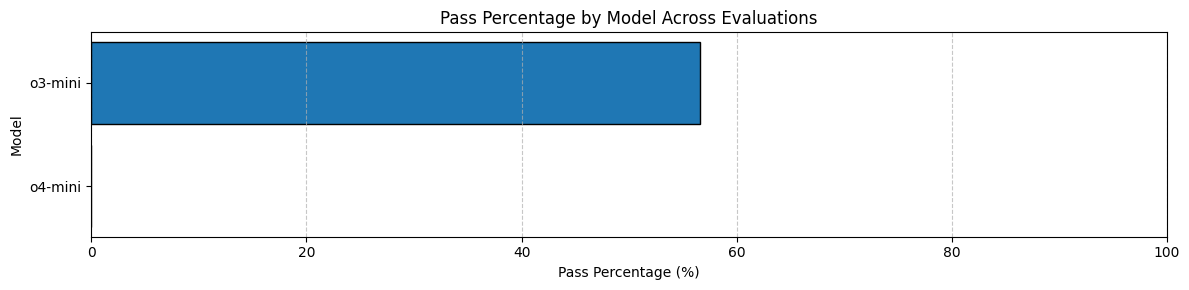

In [7]:
# Import the display_evaluation_summary function from the eval_utils script
from scripts.eval_utils import display_evaluation_summary, display_evaluation_details

# eval_id = "eval_68230245f9dc81908eedaf94a0c6b753" # azure
# eval_id = "eval_681fe1c94514819083e59acbf99d967b" # openai
# Display the evaluation summary
await display_evaluation_summary([eval_id])

In [3]:
from scripts.eval_utils import display_evaluation_details

eval_id = "eval_68230245f9dc81908eedaf94a0c6b753"
eval_run_id = "evalrun_6823026dd9fc819095dfa333d216839c"
await display_evaluation_details(eval_id=eval_id, eval_run_id=eval_run_id, max_records=10, status_filter="fail")


Evaluation Details for Run ID: evalrun_6823026dd9fc819095dfa333d216839c

Sample 1:
--------------------------------------------------
Reference Final Answer:  a = 1 
Output Final Answer: N/A
Score: 0.0
Status: fail
--------------------------------------------------

Sample 2:
--------------------------------------------------
Reference Final Answer:  EDACB 
Output Final Answer: EADCB
Score: 0.0
Status: fail
--------------------------------------------------

Sample 3:
--------------------------------------------------
Reference Final Answer: 1941
Output Final Answer: 1970
Score: 0.0
Status: fail
--------------------------------------------------

Sample 4:
--------------------------------------------------
Reference Final Answer: 3
Output Final Answer: 5
Score: 0.0
Status: fail
--------------------------------------------------

Sample 5:
--------------------------------------------------
Reference Final Answer: 7
Output Final Answer: a) The weather on the 10th day was sunny, and Vasy

In [ ]:
from scripts.dataset_utils import convert_rft_to_sft

# Convert the evaluation results to SFT format
rft_file_path = "data/Hydrobonds_Original_WoSysPromptInUser/train_900.jsonl"
sft_file_path = "data/Hydrobonds_Original_WoSysPromptInUser/train_900_sft.jsonl"
convert_rft_to_sft(rft_file_path, sft_file_path)

TypeError: convert_rft_to_sft() got an unexpected keyword argument 'status_filter'